# Лабораторная работа №1: Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

## Текстовое описание набора данных

В качестве набора данных было принято решение использовать данные о зарплатах специалистов в области Data Science:
https://www.kaggle.com/datasets/equinxx/spotify-top-50-songs-in-2021

Эти данные имеют большое значение для анализа рынка вакансий: выявления тенденций в зарплате, в необходимом стеке технологий, в распространенности профессии в различных странах и т. д.

Датасет состоит из одного файла: `spotify_top50_2021.csv`

Согласно полученной документации к данным, датасет содержит следующие столбцы:
* `Popularity` - Чем выше значение, тем популярнее песня.
* `Danceability` - Чем выше значение, тем легче танцевать под эту песню
* `Energy` - Энергия песни - чем выше значение, тем энергичнее.
* `Song Key` - ключ, в котором находится дорожка. Целые числа отображаются в высоту тона с использованием стандартной нотации класса высоты тона.  Если ключ не определен, устанавливается значение -1 (диапазон: -1; 11)
* `Loudness (dB)` - Чем выше значение, тем громче песня
* `Mode` - указывает модальность (мажор или минор) трека, тип гаммы, из которого получено его мелодическое содержание. Мажор представлен 1, а минор 0
* `Speechiness` - Чем выше значение, тем больше произнесенных слов содержит песня.
* `Acousticness` - Чем выше значение, тем акустичнее песня.
* `Instrumentalness` - количество голосов в песне. Чем ближе значение к 1.0, тем инструментальнее песня.
* `Liveness` - Чем выше значение, тем больше вероятность того, что песня записана вживую.
* `Valence` - Чем выше значение, тем больше позитивного настроения у песни.
* `Tempo` - общий предполагаемый темп трека в ударах в минуту (BPM)
* `Duration` - продолжительность песни в мс
* `Time signature` - предполагаемый тактовый размер. Тактовый размер (метр) - это условное обозначение, указывающее, сколько долей в каждом такте (или такте). Тактовый размер варьируется от 3 до 7, что указывает на тактовый размер от «3/4» до «7/4».

### Импорт библиотек

Импортируем необходимые для выполнения лабораторной работы библиотеки:

In [1]:
import pandas as pd

import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

### Загрузка данных

Загрузим файл датасета в наш проект с помощью библиотеки Pandas:

In [2]:
data = pd.read_csv('spotify_top50_2021.csv')

## Основные характеристики датасета

Выведем первые 10 строк датасета, чтобы визуально оценить наглядность данных и заметить возможные аномалии:

In [3]:
display(data.head(10))

,id,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,Olivia Rodrigo,drivers license,5wANPM4fQCJwkGd4rN57mH,92,0.561,0.431,10,-8.810,1,0.0578,0.76800,0.000014,0.1060,0.137,143.875,242013,4
1,2,Lil Nas X,MONTERO (Call Me By Your Name),1SC5rEoYDGUK4NfG82494W,90,0.593,0.503,8,-6.725,0,0.2200,0.29300,0.000000,0.4050,0.710,178.781,137704,4
2,3,The Kid LAROI,STAY (with Justin Bieber),5PjdY0CKGZdEuoNab3yDmX,92,0.591,0.764,1,-5.484,1,0.0483,0.03830,0.000000,0.1030,0.478,169.928,141806,4
3,4,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,95,0.563,0.664,9,-5.044,1,0.1540,0.33500,0.000000,0.0849,0.688,166.928,178147,4
4,5,Dua Lipa,Levitating (feat. DaBaby),5nujrmhLynf4yMoMtj8AQF,89,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,4
5,6,Justin Bieber,Peaches (feat. Daniel Caesar & Giveon),4iJyoBOLtHqaGxP12qzhQI,90,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,198082,4
6,7,Doja Cat,Kiss Me More (feat. SZA),3DarAbFujv6eYNliUTyqtz,88,0.764,0.705,8,-3.463,1,0.0284,0.25900,0.000089,0.1200,0.781,110.970,208667,4
7,8,The Weeknd,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,93,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040,4
8,9,Glass Animals,Heat Waves,02MWAaffLxlfxAUY7c5dvx,94,0.761,0.525,11,-6.900,1,0.0944,0.44000,0.000007,0.0921,0.531,80.870,238805,4
9,10,Måneskin,Beggin',3Wrjm47oTz2sjIgck11l5e,93,0.714,0.800,11,-4.808,0,0.0504,0.12700,0.000000,0.3590,0.589,134.002,211560,4


Выведем основную информацию о датасете:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                50 non-null     int64  
 1   artist_name       50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   popularity        50 non-null     int64  
 5   danceability      50 non-null     float64
 6   energy            50 non-null     float64
 7   key               50 non-null     int64  
 8   loudness          50 non-null     float64
 9   mode              50 non-null     int64  
 10  speechiness       50 non-null     float64
 11  acousticness      50 non-null     float64
 12  instrumentalness  50 non-null     float64
 13  liveness          50 non-null     float64
 14  valence           50 non-null     float64
 15  tempo             50 non-null     float64
 16  duration_ms       50 non-null     int64  
 17 

Итак, мы имеем набор данных, в котором:
* 18 колонок и 50 строк
* Все колонки имеют различные типы данных
* Пустые значения отсутствуют

Выведем основые статистические характеристики нашего датасета:

In [5]:
data.describe()

,id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,86.800000,0.685720,0.64636,5.180000,-5.903920,0.620000,0.081374,0.253811,0.001606,0.182292,0.528884,121.083860,197488.400000,3.960000
std,14.57738,6.266203,0.124987,0.14712,3.868713,2.036948,0.490314,0.057164,0.235345,0.006425,0.137799,0.232789,29.252206,34727.260592,0.197949
min,1.00000,67.000000,0.380000,0.33900,0.000000,-11.639000,0.000000,0.028400,0.001460,0.000000,0.047600,0.082300,72.017000,132780.000000,3.000000
25%,13.25000,85.250000,0.597750,0.54525,1.000000,-7.186250,0.000000,0.046125,0.040000,0.000000,0.093225,0.401500,98.655500,172400.500000,4.000000
50%,25.50000,88.000000,0.714500,0.65650,5.500000,-5.485500,1.000000,0.063150,0.196000,0.000000,0.115000,0.518000,120.516500,198712.500000,4.000000
75%,37.75000,90.000000,0.774500,0.76475,8.000000,-4.258500,1.000000,0.094300,0.405500,0.000024,0.246500,0.706250,138.532000,215597.000000,4.000000
max,50.00000,95.000000,0.903000,0.89300,11.000000,-2.810000,1.000000,0.286000,0.827000,0.038200,0.688000,0.958000,180.917000,287120.000000,4.000000


В качестве основного исследуюемого параметра выберем популярность(колонка `Popularity`), как основной параметр, по которому был собран текущий набор данных. Оценим уникальные значения этого параметра.

In [6]:
data['popularity'].unique()

array([92, 90, 95, 89, 88, 93, 94, 77, 87, 71, 86, 69, 67, 85, 82, 84, 81,
       78, 79], dtype=int64)

## Визуальное исследование датасета

<AxesSubplot:xlabel='energy', ylabel='valence'>

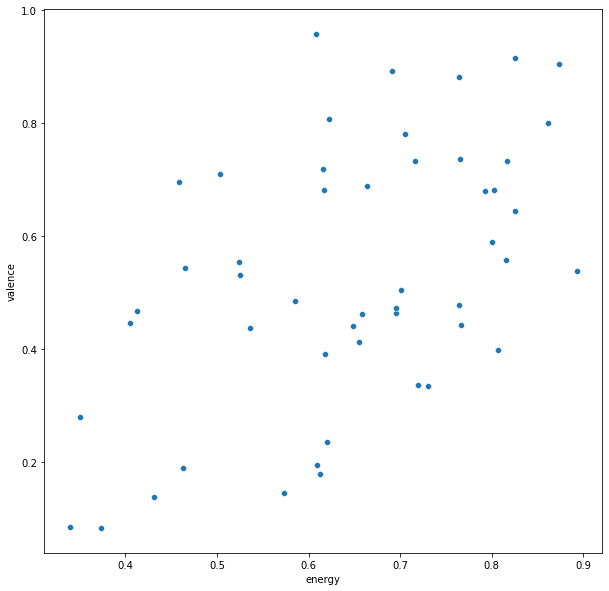

In [7]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='energy', y='valence', data=data)

Несмотря на небольшое кол-во данных, можно заметить, что чем больше показатель энергии, тем выше показатель настроения.

Оценим, как оба этих параметра влияют на показатель популярности песни:

<AxesSubplot:xlabel='energy', ylabel='valence'>

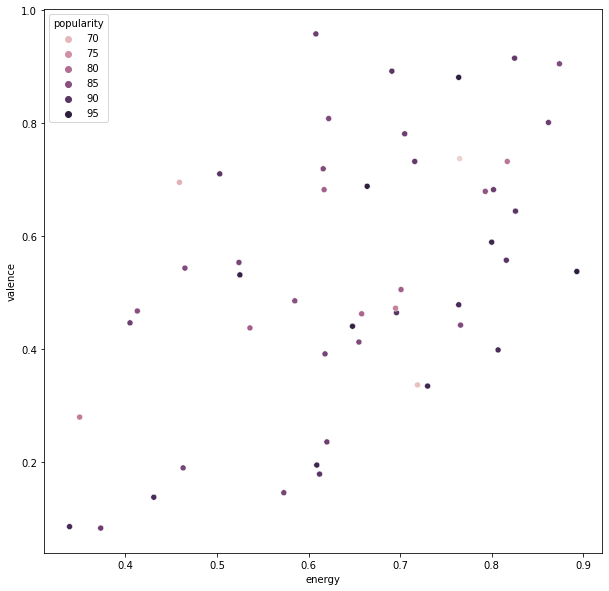

In [8]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='energy', y='valence', data=data, hue='popularity')

C:\Users\Tim\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valence', ylabel='Density'>

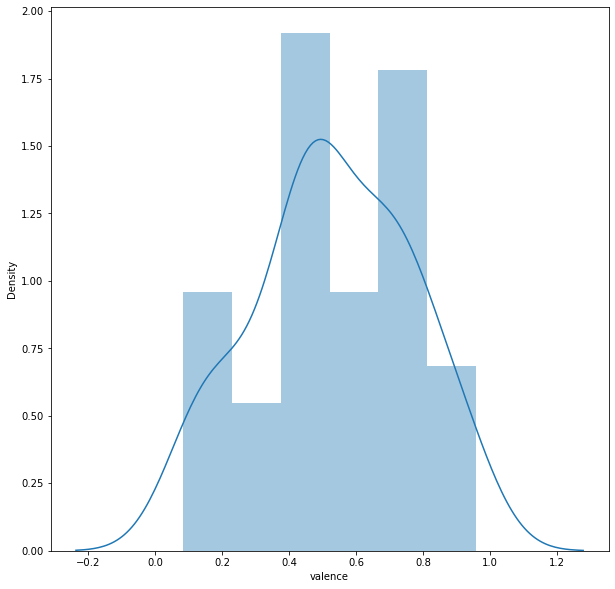

In [9]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['valence'])

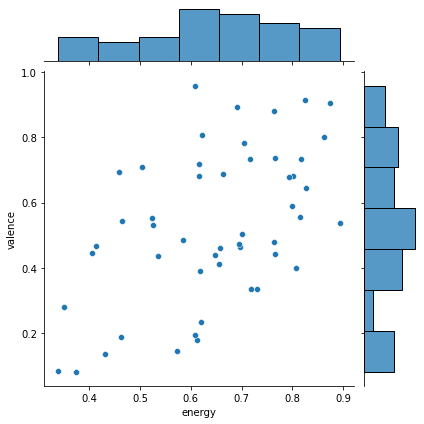

In [10]:
sns.jointplot(x='energy', y='valence', data=data)

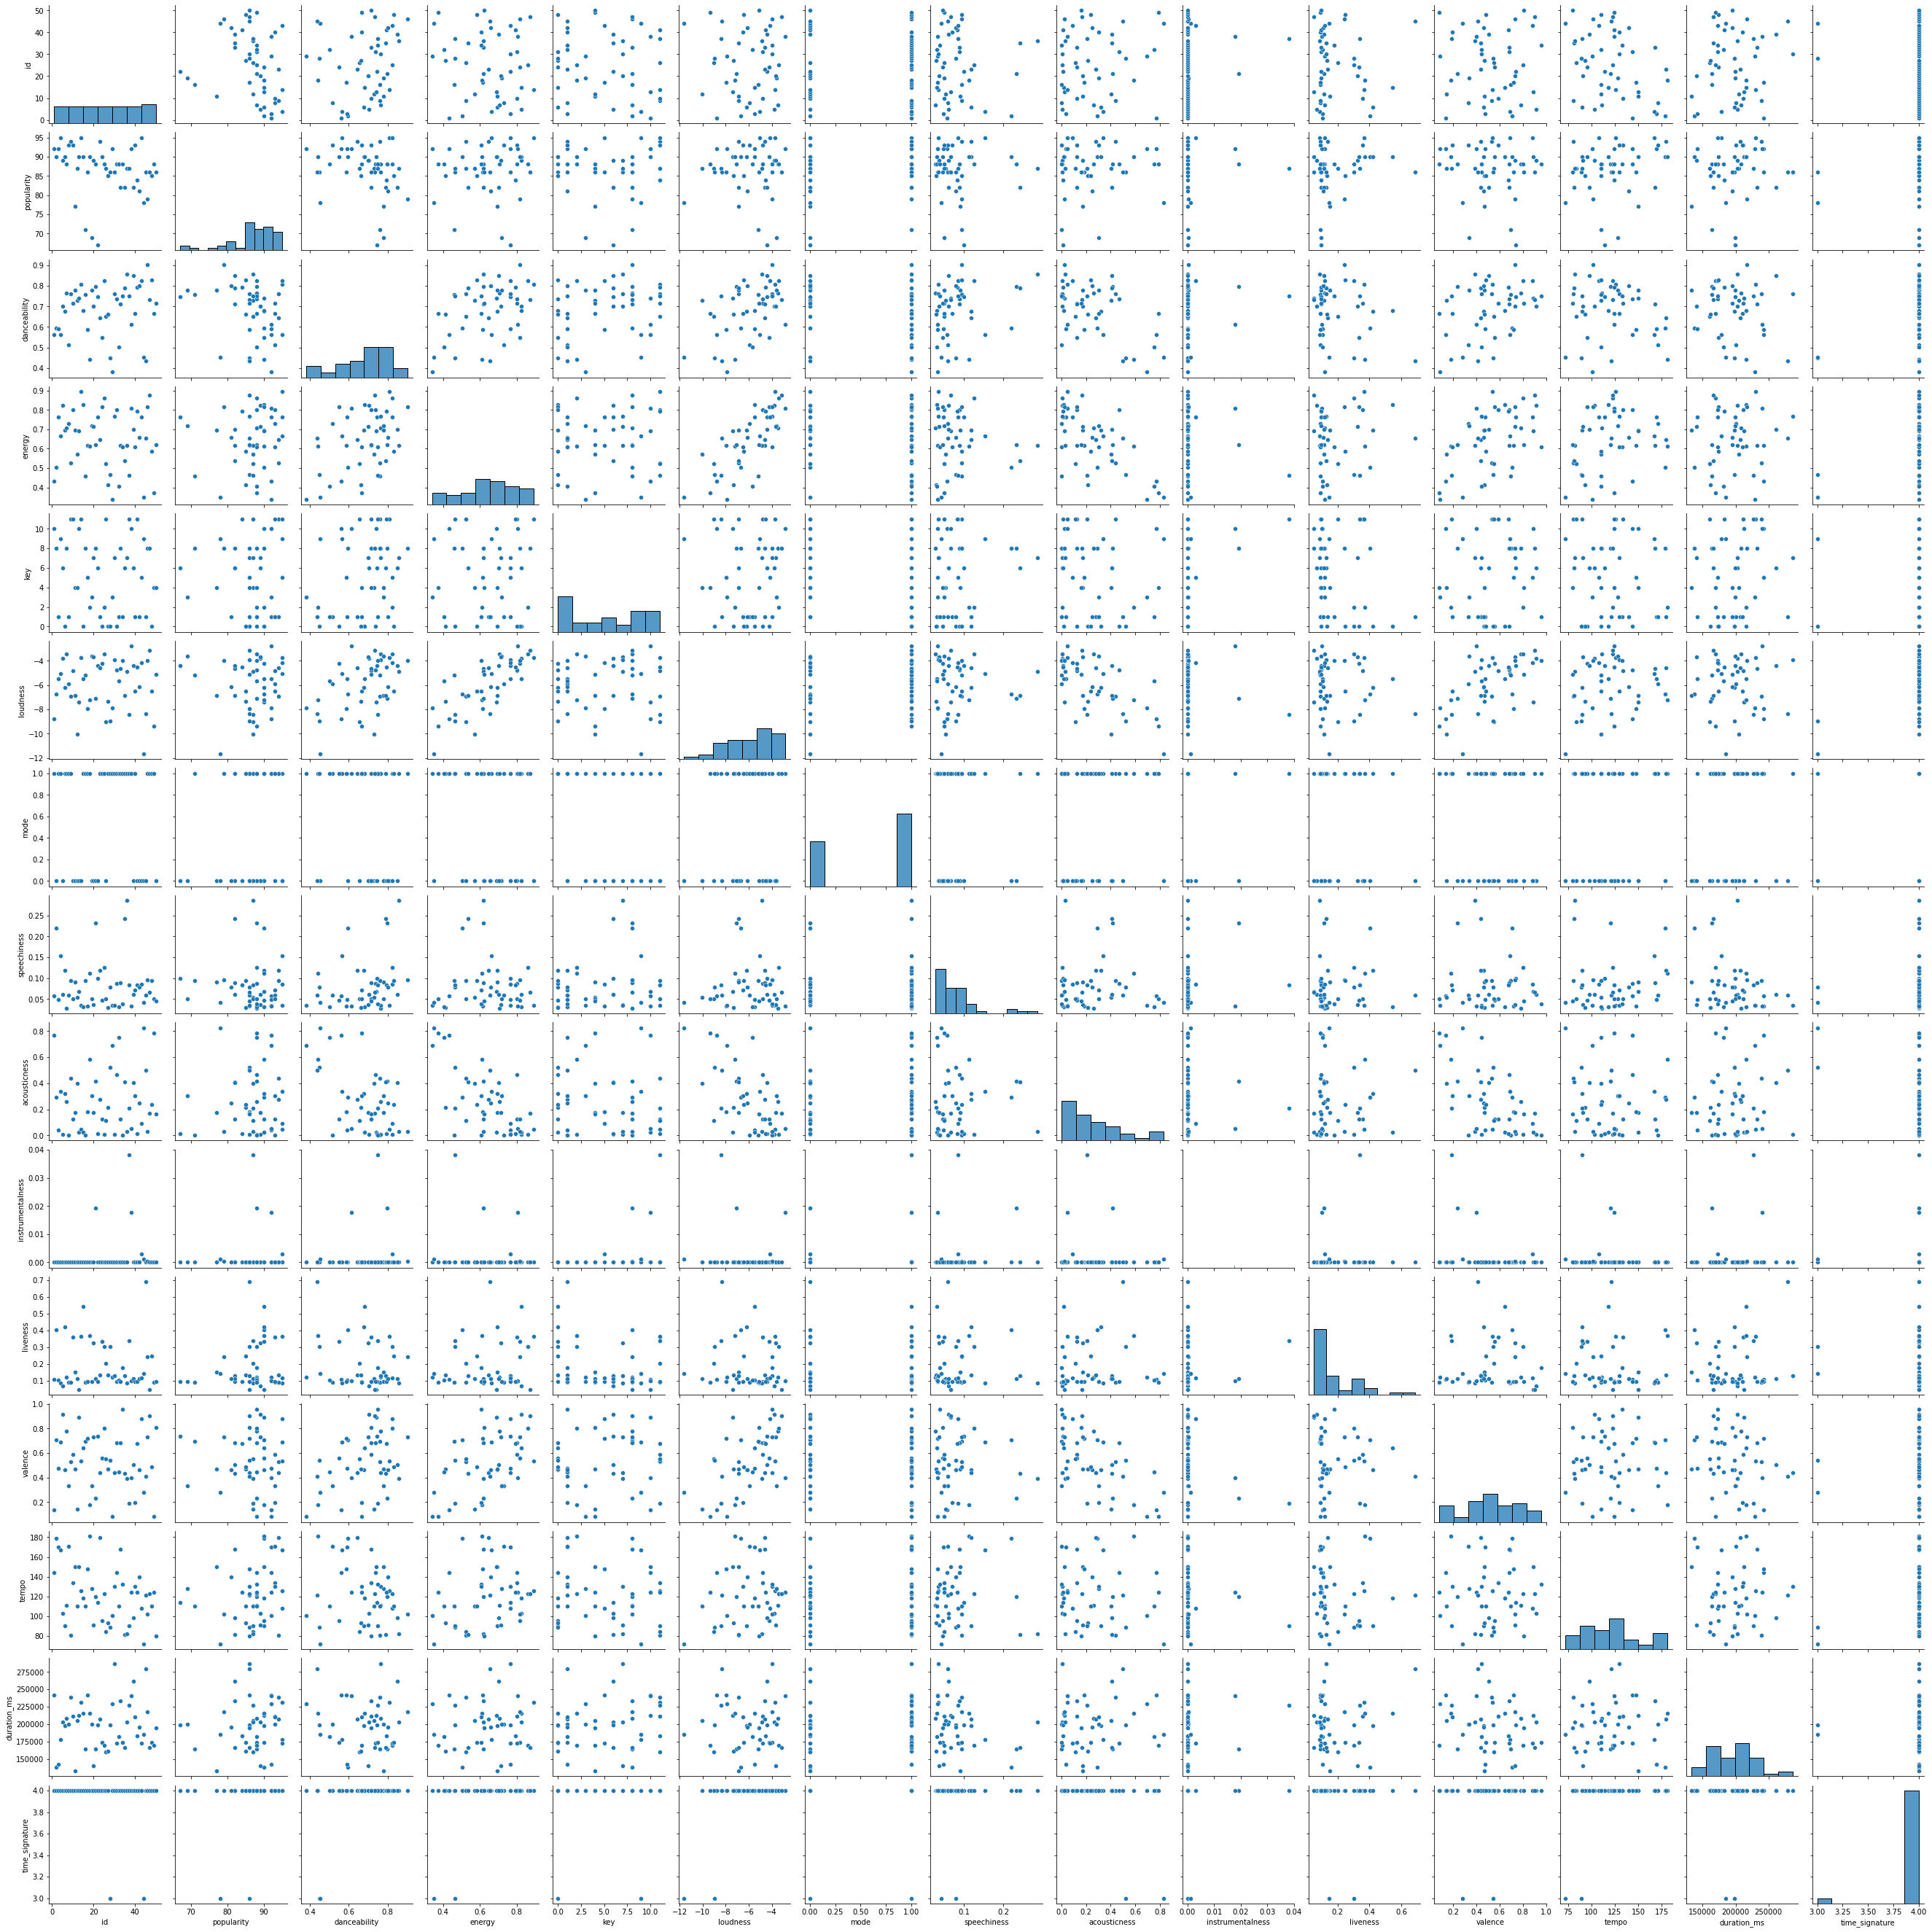

In [11]:
sns.pairplot(data)

<AxesSubplot:xlabel='energy'>

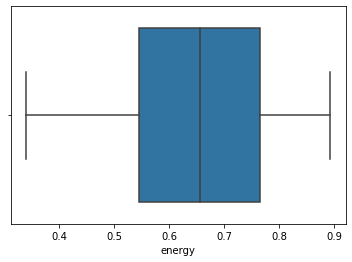

In [12]:
sns.boxplot(x=data['energy'])

<AxesSubplot:xlabel='popularity', ylabel='energy'>

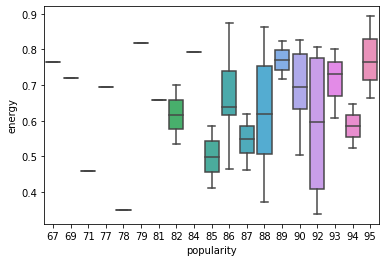

In [13]:
sns.boxplot(x='popularity', y='energy', data=data)

<AxesSubplot:xlabel='energy'>

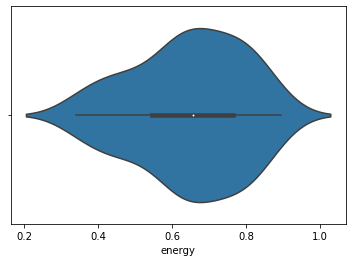

In [14]:
sns.violinplot(x=data['energy'])

C:\Users\Tim\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='energy', ylabel='Density'>

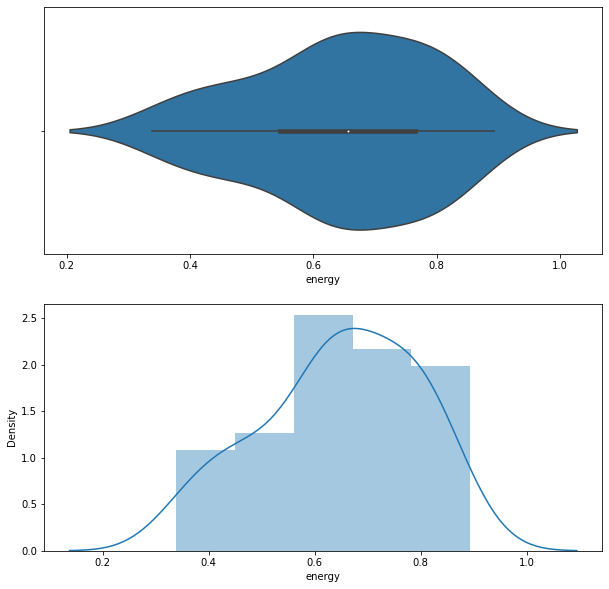

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['energy'])
sns.distplot(data['energy'], ax=ax[1])

<AxesSubplot:xlabel='popularity', ylabel='energy'>

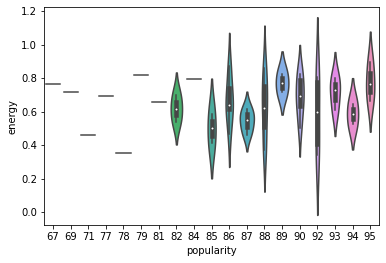

In [16]:
sns.violinplot(x='popularity', y='energy', data=data)

## Информация о корреляции признаков

In [17]:
data.corr()

,id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,1.000000,-0.231462,0.171220,-0.103420,-0.114533,-0.007781,0.015704,-0.046188,0.104926,0.141411,-0.065445,-0.043711,-0.369088,0.087073,-0.148522
popularity,-0.231462,1.000000,-0.275659,0.085398,-0.006061,0.000690,0.240455,-0.039281,0.068833,0.066601,0.165771,-0.068797,0.209988,0.106071,0.157949
danceability,0.171220,-0.275659,1.000000,0.424101,0.266594,0.466949,-0.194921,0.258465,-0.524703,0.088759,-0.231599,0.360962,-0.185919,-0.104433,0.387228
energy,-0.103420,0.085398,0.424101,1.000000,0.020071,0.749475,-0.165835,-0.068540,-0.675219,-0.098496,0.130796,0.513768,0.221239,0.068041,0.334776
key,-0.114533,-0.006061,0.266594,0.020071,1.000000,0.026175,-0.296727,0.119803,-0.133163,0.300551,-0.198790,0.119263,-0.111567,0.164862,0.036243
loudness,-0.007781,0.000690,0.466949,0.749475,0.026175,1.000000,0.068546,-0.009078,-0.629024,-0.101044,-0.099097,0.579425,0.142757,-0.011897,0.445159
mode,0.015704,0.240455,-0.194921,-0.165835,-0.296727,0.068546,1.000000,0.033207,0.086673,0.044489,-0.070092,-0.148440,0.097850,0.099699,0.050465
speechiness,-0.046188,-0.039281,0.258465,-0.068540,0.119803,-0.009078,0.033207,1.000000,-0.005745,0.117197,-0.015350,-0.049890,0.044644,-0.267925,0.074213
acousticness,0.104926,0.068833,-0.524703,-0.675219,-0.133163,-0.629024,0.086673,-0.005745,1.000000,-0.028664,0.008522,-0.608244,-0.101145,0.081368,-0.369461
instrumentalness,0.141411,0.066601,0.088759,-0.098496,0.300551,-0.101044,0.044489,0.117197,-0.028664,1.000000,0.067491,-0.275311,-0.135957,0.106881,0.031945


<AxesSubplot:>

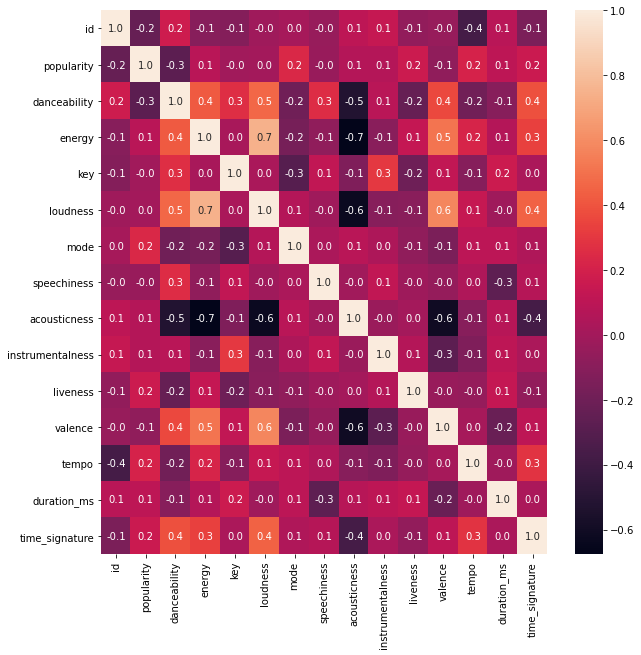

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='.1f')

* Целевой признак почти не коррелирует с приведенными параметрами.
* `energy` и `loudness` и `valence` достаточно сильно коррелируют между собой